## Część I

In [53]:
import numpy as np
import scipy
import chardet
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint

# Zadanie 1.1

##### 1. Wczytaj dane i przygotuj je do analizy. Zadbaj o odpowiednie typy zmiennych, zweryfikuj czy przyjmują wartości zgodne z powyższym opisem, zbadaj czy nie występują braki w danych.

In [17]:
with open("D:/Na uczelnię semestr 6/Analiza danych ankietowych/ankieta.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [18]:
data = pd.read_csv("D:/Na uczelnię semestr 6/Analiza danych ankietowych/ankieta.csv", encoding='ISO-8859-1', sep=";")

Czy są braki

In [19]:
czy_sa_braki = data.isna().any().any()
print(czy_sa_braki)

False


Zmiana nazwy kolumn

In [20]:
data.columns = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PYT_1', 'PYT_2', 'PYT_3', 'PŁEĆ', 'WIEK']

In [21]:
df = pd.DataFrame(data)

Sprawdzenie typów 

In [22]:
print(df.dtypes)

DZIAŁ       object
STAŻ         int64
CZY_KIER    object
PYT_1        int64
PYT_2        int64
PYT_3        int64
PŁEĆ        object
WIEK         int64
dtype: object


In [23]:
# Wyświetl liczbę wystąpień każdej wartości w kolumnach
for kolumna in df.columns:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print() 

Liczba wystąpień wartości w kolumnie 'DZIAŁ':
PD    98
MK    45
HR    31
IT    26
Name: DZIAŁ, dtype: int64

Liczba wystąpień wartości w kolumnie 'STAŻ':
2    140
1     41
3     19
Name: STAŻ, dtype: int64

Liczba wystąpień wartości w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_1':
 1    100
 0     40
 2     29
-1     17
-2     14
Name: PYT_1, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_2':
 2    104
-2     74
-1     20
 1      2
Name: PYT_2, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_3':
 2    86
-2    52
 1    32
-1    30
Name: PYT_3, dtype: int64

Liczba wystąpień wartości w kolumnie 'PŁEĆ':
M    129
K     71
Name: PŁEĆ, dtype: int64

Liczba wystąpień wartości w kolumnie 'WIEK':
40    16
36    13
39    11
44    11
42    10
45    10
37     9
38     9
43     8
53     7
48     7
41     7
49     6
54     5
52     5
50     5
64     5
28     4
46     4
65     4
33     4
30     4
47     3
58    

# Zadanie 1.2

Została utworzona zmienną WIEK_KAT, w której została przeprowadzona kategoryzacja zmiennej WIEK korzystając z następujących przedziałów: 
- do 35 lat, 
- między 36 a 45 lat, 
- między 46 a 55 lat,
- powyżej 55 lat.

In [24]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                         bins=[0, 35, 45, 55, float('inf')], 
                         labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                         right=True)  # Domknięcie przedziałów z prawej strony

In [25]:
for kolumna in ['WIEK_KAT']:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()

Liczba wystąpień wartości w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: WIEK_KAT, dtype: int64



# Zadanie 1.3.

In [26]:
for kolumna in df.drop(columns=['WIEK', 'PYT_1', 'PYT_2', 'PYT_3']).columns:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()  

Liczba wystąpień wartości w kolumnie 'DZIAŁ':
PD    98
MK    45
HR    31
IT    26
Name: DZIAŁ, dtype: int64

Liczba wystąpień wartości w kolumnie 'STAŻ':
2    140
1     41
3     19
Name: STAŻ, dtype: int64

Liczba wystąpień wartości w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystąpień wartości w kolumnie 'PŁEĆ':
M    129
K     71
Name: PŁEĆ, dtype: int64

Liczba wystąpień wartości w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: WIEK_KAT, dtype: int64



Wnioski:

# Zadanie 1.4

Sporządzone zostały wykresy kołowe oraz wykresy słupkowe dla zmiennych: PYT_1 oraz PYT_2.

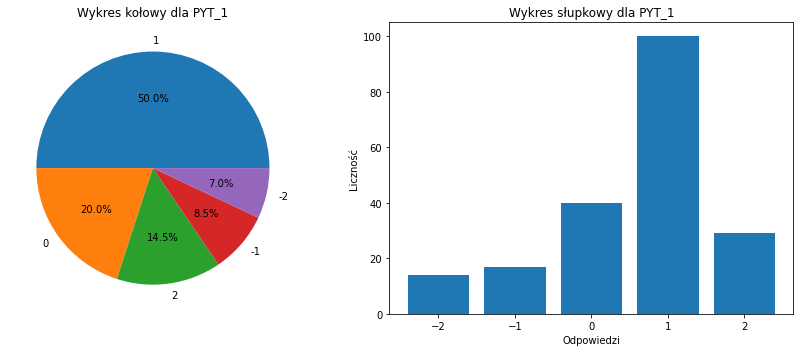

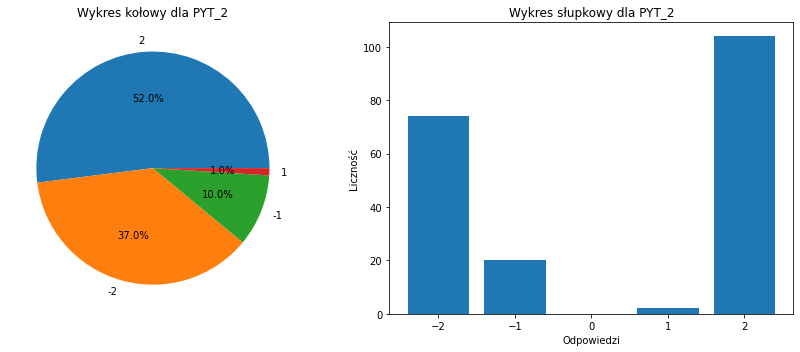

In [27]:
def generuj_wykresy(df, kolumna):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Wykres kołowy
    df[kolumna].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
    ax[0].set_title(f'Wykres kołowy dla {kolumna}')
    ax[0].set_ylabel('')

    # Wykres słupkowy z pełnym zakresem odpowiedzi
    zakres = [-2, -1, 0, 1, 2]
    wartosci = df[kolumna].value_counts().reindex(zakres, fill_value=0)
    ax[1].bar(wartosci.index, wartosci.values)
    ax[1].set_title(f'Wykres słupkowy dla {kolumna}')
    ax[1].set_xlabel('Odpowiedzi')
    ax[1].set_ylabel('Liczność')
    ax[1].set_xticks(zakres)

    plt.tight_layout()
    plt.show()

generuj_wykresy(df, 'PYT_1')
generuj_wykresy(df, 'PYT_2')


Na podstawie wykresów kołowych i słupkowych dla zmiennych PYT_1 i PYT_2 można sformułować następujące obserwacje:

1. PYT_1 dotyczy oceny wsparcia i materiałów szkoleniowych oferowanych przez firmę.

- Najwięcej ankietowanych (50%) zgodziło się ze stwierdzeniem, że firma zapewnia odpowiednie wsparcie i materiały umożliwiające skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkoleń (wartość 1), a 14,5% zdecydowanie się zgodziło (wartość 2), co łącznie daje 64,5% pozytywnych odpowiedzi.

- Mniejszy odsetek uczestników ankiety wyraził brak zdania (0) lub niezgodę (-1, -2).

Wniosek: większość badanych pozytywnie ocenia materiały i wsparcie oferowane podczas szkoleń.

2. PYT_2 dotyczy oceny dopasowania szkoleń do indywidualnych potrzeb pracownika.

- 52% ankietowanych zdecydowanie się zgodziło ze stwierdzeniem, że firma oferuje szkolenia dostosowane do potrzeb ankietowanych, wspierając ich rozwój zawodowy i szanse na awans (wartość 2), a 1% wyraziło umiarkowaną zgodę (wartość 1), co ogólnie wskazuje na wysoki poziom pozytywnej oceny (łącznie 53%).

- Jednocześnie 37% badanych zdecydowanie się nie zgodziło (wartość -2) oraz 10% nie zgodziło się (wartość -1), co wskazuje na istotną grupę niezadowolonych.

Wniosek: opinie są bardziej spolaryzowane — choć dominuje ocena pozytywna, spora część ankietowanuych ocenia szkolenia krytycznie.

# Zadanie 1.5.

In [28]:
# Tworzenie tabel wielodzielczych dla par zmiennych
tablice_wielodzielcze = {
    'PYT_1 vs DZIAŁ': pd.crosstab(df['PYT_1'], df['DZIAŁ']),
    'PYT_1 vs STAŻ': pd.crosstab(df['PYT_1'], df['STAŻ']),
    'PYT_1 vs CZY_KIER': pd.crosstab(df['PYT_1'], df['CZY_KIER']),
    'PYT_1 vs PŁEĆ': pd.crosstab(df['PYT_1'], df['PŁEĆ']),
    'PYT_1 vs WIEK_KAT': pd.crosstab(df['PYT_1'], df['WIEK_KAT'])
}

def rys_tabl_wielod(tablice_wielodzielcze):
    for nazwa, tabela in tablice_wielodzielcze.items():
        print(f"\nTabela wielodzielcza: {nazwa}")
        print(tabela)
        print()  # Dodanie pustej linii dla czytelności
        
rys_tabl_wielod(tablice_wielodzielcze)


Tabela wielodzielcza: PYT_1 vs DZIAŁ
DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11


Tabela wielodzielcza: PYT_1 vs STAŻ
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2


Tabela wielodzielcza: PYT_1 vs CZY_KIER
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2


Tabela wielodzielcza: PYT_1 vs PŁEĆ
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18


Tabela wielodzielcza: PYT_1 vs WIEK_KAT
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5               8
 1      

Wnioski:

# Zadanie 1.6

Sporządzone zostały tablice wielodzielcze dla pary zmiennych: PYT_2 i PYT_3

In [29]:
tablica_wielodzielcza = {'PYT_2 vs PYT_3':pd.crosstab(df['PYT_2'], df['PYT_3'])}
rys_tabl_wielod(tablica_wielodzielcza)


Tabela wielodzielcza: PYT_2 vs PYT_3
PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81



Na podstawie tablicy wielodzielczej przedstawiającej relację między odpowiedziami w PYT_2 i PYT_3 dotyczące wsparcia w rozwoju zawodowym i możliwości awansu w firmie, można zauważyć wyraźną zmianę postaw:

Osoby, które wcześniej (w PYT_2) wyraziły zdecydowaną zgodę (wartość 2) w przeważającej większości utrzymały swoją pozytywną ocenę: 81 osób wskazało ponownie wartość 2, 15 — wartość 1. Niektórzy jednak zmienili swoją ocenę na negatywną: 8 osób, które wcześniej wkazało wartośc 2 później wskazało wartość -1.

Co istotne, wielu respondentów, którzy wcześniej mieli ocenę negatywną, zmieniło ją na bardziej pozytywną:

Wśród osób, które wcześniej wybrały wartość -2, 9 osób później udzieliło odpowiedzi 1 lub 2 (czyli pozytywnej), a 16 osób wybrało wartość -1 (negatywnej lecz mniej skrajnej). Wśród osób, które wcześniej wybrały wartość -1, 3 z nich wyraziły większe niezadowolenie, lecz 11 osób zmieniło swoją opinię z negatywnej na pozytywną.

Wartości skrajnie negatywne w PYT_3 są zauważalnie rzadsze niż w PYT_2.

Wniosek:
Po cyklu szkoleń nastąpiła poprawa postrzegania działań firmy w zakresie wsparcia rozwoju zawodowego i awansu. Większość ankietowanych utrzymała pozytywne oceny, a część wcześniej sceptycznych zmieniła zdanie na bardziej przychylne. Zmiany w negatywną stronę dla firmy wystąpiły w znacznie mniejszym stopniu. Może to świadczyć o skuteczności wdrożonej interwencji szkoleniowej.

# Zadanie 1.7

In [30]:
mapowanie = {
    -2: "Nie zadowolony",
    -1: "Nie zadowolony",
     1: "Zadowolony",
     2: "Zadowolony"
}

# Tworzenie nowej kolumny CZY_ZADOW
df['CZY_ZADOW'] = df['PYT_2'].map(mapowanie)

# Sprawdzenie wyników
print(df['CZY_ZADOW'].value_counts())


Zadowolony        106
Nie zadowolony     94
Name: CZY_ZADOW, dtype: int64


# Zadanie 1.8

Zostały sporządzone wykresy mozaikowe odpowiadające parom zmiennych:
- CZY_ZADOW i DZIAŁ, 
- CZY_ZADOW i STAZ˙,
- CZY_ZADOW i CZY_KIER, 
- CZY_ZADOW i PŁEć´,
- CZY_ZADOW i WIEK_KAT.

Odpowiedziano również na pytanie: Czy na podstawie uzyskanch wykresów można postawić pewne hipotezy dotyczące realicji między powyższymi zmiennymi?

<Figure size 864x648 with 0 Axes>

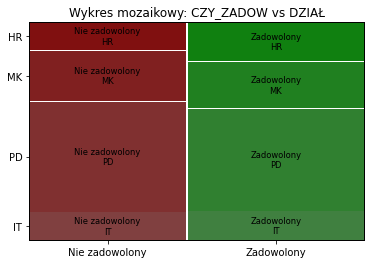

<Figure size 864x648 with 0 Axes>

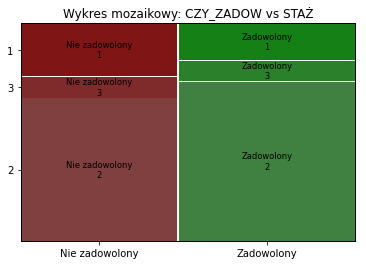

<Figure size 864x648 with 0 Axes>

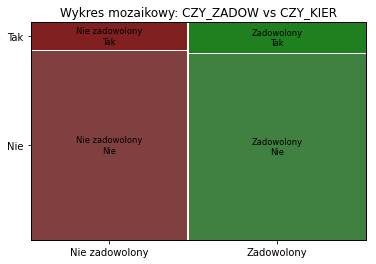

<Figure size 864x648 with 0 Axes>

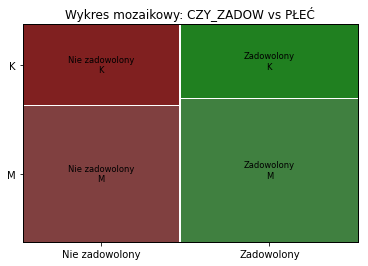

<Figure size 864x648 with 0 Axes>

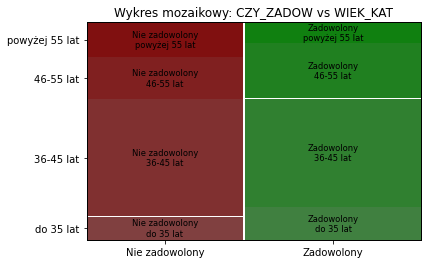

In [36]:
# Lista par zmiennych do wykresów mozaikowych
pary_zmiennych = [
    ('CZY_ZADOW', 'DZIAŁ'),
    ('CZY_ZADOW', 'STAŻ'),
    ('CZY_ZADOW', 'CZY_KIER'),
    ('CZY_ZADOW', 'PŁEĆ'),
    ('CZY_ZADOW', 'WIEK_KAT')
]

# Tworzenie wykresów mozaikowych
for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(12, 9))
    mosaic(df, [zmienna1, zmienna2], title=f'Wykres mozaikowy: {zmienna1} vs {zmienna2}')
    plt.show()



1. Pracownicy działu HR są częściej zadowoleni niż pracownicy innych działów.

2. Najkrótszy staż (1 rok) wiąże się z większym niezadowoleniem w porównaniu do osób ze stażem 2 lub 3 lata.

3. Kierownicy częściej deklarują zadowolenie niż pracownicy niepełniący funkcji kierowniczych.
Może to sugerować większe obciążenie, odpowiedzialność lub mniejsze wsparcie.

4. Zadowolenie z pracy nie różni się istotnie między kobietami i mężczyznami.
Wykres mozaikowy dla płci pokazuje dość zrównoważony rozkład.

5. Osoby powyżej 55 lat wykazują wyraźnie większy poziom niezadowolenia.
Może to wynikać z braku dalszych perspektyw rozwoju, zmęczenia lub mniejszej zgodności z firmową kulturą.



## Część II

# Zadanie 2

Celem zadania było zilustrowanie odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na (...)?"(zmienna PYT_1) w całej badanej grupie oraz w podgrupach ze względu na zmienną CZY_KIER. 

In [46]:
import altair as alt
import pandas as pd

# Etykiety odpowiedzi
labels = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
     0: "Neutralnie",
     1: "Zgadzam się",
     2: "Zdecydowanie się zgadzam"
}

# Przygotowanie danych
df1 = df[['PYT_1', 'CZY_KIER']].copy()
df1['PYT_1_label'] = df1['PYT_1'].map(labels)

# Wykres ogólny
overall = alt.Chart(df1).mark_bar().encode(
    x=alt.X('PYT_1_label:N', title='Odpowiedzi na PYT_1', sort=list(labels.values())),
    y=alt.Y('count()', title='Liczba wystąpień'),
    tooltip=['count()']
).properties(
    width=300,
    height=300,
    title="Rozkład odpowiedzi na PYT_1 w całej grupie"
)

# Wykres z podziałem na CZY_KIER
subgroup = alt.Chart(df1).mark_bar().encode(
    x=alt.X('PYT_1_label:N', title='Odpowiedzi na PYT_1', sort=list(labels.values())),
    y=alt.Y('count()', title='Liczba wystąpień'),
    color=alt.Color('CZY_KIER:N', title='Czy kierownik'),
    tooltip=['count()']
).properties(
    width=300,
    height=300,
    title="Rozkład odpowiedzi na PYT_1 według CZY_KIER"
)

# Wyświetlenie obok siebie
alt.hconcat(overall, subgroup)


alt.HConcatChart(...)

# Zadanie 3

In [20]:
# Losowanie bez zwracania
np.random.choice(10, 5, replace=False)  # Losuje 5 unikalnych liczb z zakresu 0:9

array([9, 3, 6, 5, 2])

In [21]:
# Losowanie ze zwracaniem
np.random.choice(10, 5, replace=True)  # Losuje 5 liczb z zakresu 0:9, ze zwracaniem


array([1, 4, 2, 1, 5])

In [22]:
# Losowanie z wagami
np.random.choice(10, 5, replace=True, p=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.4, 0.1, 0.1, 0.1])

array([6, 6, 7, 3, 6])

In [23]:
# Losowanie próbki bez zwracania (10% rekordów)
próbka_bez_zwracania = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=False)]

# Losowanie próbki ze zwracaniem (10% rekordów)
próbka_ze_zwracaniem = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=True)]

In [24]:
próbka_bez_zwracania

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
149,MK,3,Tak,0,-2,-2,M,37,36-45 lat,Nie zadowolony
65,PD,2,Nie,1,-1,1,M,62,powyżej 55 lat,Nie zadowolony
76,PD,2,Nie,1,2,1,K,41,36-45 lat,Zadowolony
34,PD,1,Nie,-1,-2,-2,M,28,do 35 lat,Nie zadowolony
82,PD,1,Nie,1,-2,-1,M,52,46-55 lat,Nie zadowolony
188,HR,2,Nie,1,2,2,M,49,46-55 lat,Zadowolony
186,HR,2,Tak,2,2,2,M,48,46-55 lat,Zadowolony
194,HR,3,Tak,1,2,-1,M,26,do 35 lat,Zadowolony
83,PD,1,Nie,1,2,2,M,54,46-55 lat,Zadowolony
174,HR,2,Nie,1,2,2,M,43,36-45 lat,Zadowolony


In [25]:
próbka_ze_zwracaniem 

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
158,MK,2,Nie,0,-2,-2,M,64,powyżej 55 lat,Nie zadowolony
105,PD,2,Nie,1,2,2,K,36,36-45 lat,Zadowolony
68,PD,1,Nie,-1,-2,-1,M,25,do 35 lat,Nie zadowolony
112,PD,1,Tak,-1,-2,-1,M,37,36-45 lat,Nie zadowolony
18,IT,2,Nie,1,2,-1,K,34,do 35 lat,Zadowolony
30,PD,1,Nie,1,2,2,M,32,do 35 lat,Zadowolony
16,IT,2,Nie,0,-2,-2,K,45,36-45 lat,Nie zadowolony
33,PD,1,Nie,-1,-2,-2,M,25,do 35 lat,Nie zadowolony
154,MK,2,Nie,2,2,2,M,32,do 35 lat,Zadowolony
164,MK,2,Nie,1,2,2,M,50,46-55 lat,Zadowolony


# Zadanie 4

Celem zadania było zaproponowanie metody symulowania zmiennych losowych z rozkładu dwumianowego. Została napisana funkcja do generowania realizacji, a następnie zaprezentowano jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: n i p

[5 6 4 ... 5 6 1]
Teoretyczne średnie: [30. 40. 30.]
Teoretyczne wariancje: [21. 24. 21.]
Empiryczne średnie: [30.0165 39.928  30.0555]
Empiryczne wariancje: [21.27382775 23.753416   21.20401975]


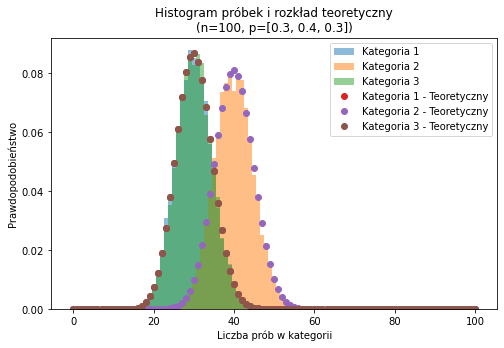

In [41]:
def binomial_random_variable(n, p, size=1):
    return np.sum(np.random.rand(size, n) < p, axis=1)

n, p = 10, 0.5
size = 10000
samples = binomial_random_variable(n, p, size)
print(samples)


def multinomial_random_variable(n, p, size=1):
    return np.random.multinomial(n, p, size)

n = 100
p = [0.3, 0.4, 0.3]
size = 10000
samples = multinomial_random_variable(n, p, size)

theoretical_means = np.array([n * p_i for p_i in p])
theoretical_variances = np.array([n * p_i * (1 - p_i) for p_i in p])

empirical_means = np.mean(samples, axis=0)
empirical_variances = np.var(samples, axis=0)

print("Teoretyczne średnie:", theoretical_means)
print("Teoretyczne wariancje:", theoretical_variances)
print("Empiryczne średnie:", empirical_means)
print("Empiryczne wariancje:", empirical_variances)

fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(p)):
    ax.hist(samples[:, i], bins=np.arange(n+2) - 0.5, density=True, alpha=0.5, label=f'Kategoria {i+1}')

x = np.arange(n+1)
for i, p_i in enumerate(p):
    pmf_theoretical = scipy.special.comb(n, x) * (p_i**x) * ((1 - p_i)**(n - x))
    ax.plot(x, pmf_theoretical, 'o', label=f'Kategoria {i+1} - Teoretyczny')

ax.set_title(f'Histogram próbek i rozkład teoretyczny\n(n={n}, p={p})')
ax.set_xlabel('Liczba prób w kategorii')
ax.set_ylabel('Prawdopodobieństwo')
ax.legend()
plt.show()

# Zadanie 5

In [28]:
def generuj_wielomianowe_wlasne(n, p, rozmiar_proby):
    k = len(p)  # Liczba kategorii
    realizacje = np.zeros((rozmiar_proby, k), dtype=int)
    
    for i in range(rozmiar_proby):
        # Symulacja n prób wielokategorialnych
        wyniki = np.random.choice(k, size=n, p=p)
        # Zliczanie liczby sukcesów w każdej kategorii
        realizacje[i] = np.bincount(wyniki, minlength=k)
    
    return realizacje

n = 10  # Liczba prób
p = [0.2, 0.3, 0.5]  # Wektor prawdopodobieństw (suma musi być równa 1)
rozmiar_proby = 1000  # Liczba realizacji

In [29]:
samples = generuj_wielomianowe_wlasne(n, p, rozmiar_proby)
print(samples)

# Empiryczne średnie i wariancje
empirical_mean = np.mean(samples, axis=0)
empirical_var = np.var(samples, axis=0, ddof=1)

# Teoretyczne średnie i wariancje
theoretical_mean = n * np.array(p)
theoretical_var = n * np.array(p) * (1 - np.array(p))

# Prezentacja wyników
data = pd.DataFrame({
    'Kategoria': [f'k{i+1}' for i in range(len(p))],
    'Średnia teoretyczna': theoretical_mean,
    'Średnia empiryczna': empirical_mean,
    'Wariancja teoretyczna': theoretical_var,
    'Wariancja empiryczna': empirical_var
})

print(data)


[[3 4 3]
 [3 2 5]
 [1 3 6]
 ...
 [1 3 6]
 [2 2 6]
 [1 6 3]]
  Kategoria  Średnia teoretyczna  Średnia empiryczna  Wariancja teoretyczna  \
0        k1                  2.0               2.126                    1.6   
1        k2                  3.0               2.837                    2.1   
2        k3                  5.0               5.037                    2.5   

   Wariancja empiryczna  
0              1.767892  
1              2.038469  
2              2.442073  


## Część III oraz IV

# Zadanie 6

Została napisana funkcja do wyznaczania realizacji przedziału ufności Cloppera-Pearsona, oraz pokazno jej przykładowe użycie.

In [67]:
def clopper_pearson(confidence, successes=None, trials=None, data=None):
    """
    Oblicza przedział ufności Cloppera-Pearsona dla prawdopodobieństwa sukcesu w schemacie dwumianowym.
    
    Argumenty:
        confidence (float): Poziom ufności (np. 0.95 dla 95%)
        successes (int, opcjonalnie): Liczba sukcesów
        trials (int, opcjonalnie): Liczba prób
        data (list lub array, opcjonalnie): Wektor danych (0 - porażka, 1 - sukces)
    
    Zwraca:
        (dolna granica, górna granica) przedziału ufności
    """
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    if successes is None or trials is None:
        raise ValueError("Musisz podać albo (successes, trials), albo wektor data.")
    
    alpha = 1 - confidence
    lower_bound = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return (lower_bound, upper_bound)

In [68]:
import math
# Przykład 1: Podanie liczby sukcesów i prób
ci1 = clopper_pearson(0.95, successes=20, trials=100)
print("Przedział ufności (Clopper-Pearson) dla 20 sukcesów na 100 prób:", ci1)

# Przykład 2: Podanie wektora danych
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
ci2 = clopper_pearson(0.95, data=data)
print("Przedział ufności (Clopper-Pearson) dla podanego wektora danych:", ci2)


Przedział ufności (Clopper-Pearson) dla 20 sukcesów na 100 prób: (0.1266555521019559, 0.2918426890886279)
Przedział ufności (Clopper-Pearson) dla podanego wektora danych: (0.3605425873074897, 0.8088099392746928)


# Zadanie 7

In [32]:
df['CZY_ZADW'] = df['PYT_2'].map(mapowanie) == "Zadowolony"
df['CZY_ZADW_2'] = df['PYT_3'].map(mapowanie) == "Zadowolony"

In [33]:
# Przedział ufności dla pierwszego okresu
ci_czy_zadw = clopper_pearson(0.95, data=df['CZY_ZADW'].astype(int))
print("Przedział ufności dla CZY_ZADW:", ci_czy_zadw)

# Przedział ufności dla drugiego okresu
ci_czy_zadw_2 = clopper_pearson(0.95, data=df['CZY_ZADW_2'].astype(int))
print("Przedział ufności dla CZY_ZADW_2:", ci_czy_zadw_2)

Przedział ufności dla CZY_ZADW: (0.45833050041147494, 0.6007670588028855)
Przedział ufności dla CZY_ZADW_2: (0.5184215852127789, 0.6588693543285322)


# Zadanie 8

Celem zadania było zapoznanie się z funkcjami do generowania zmiennych losowych z rozkładu dwumianowego oraz do wyznaczania przedziałów ufności dla parametru p. Do generowania danych użyto funkcji np.random.binomial() z biblioteki NumPy, a do wyznaczania przedziałów ufności dla parametru 𝑝 wykorzystano funkcję proportion_confint() z biblioteki statsmodels,
z dwoma różnymi metodami:
- 'beta' (dokładna metoda Cloppera-Pearsona),
- 'wilson' (przybliżona, ale węższa metoda Wilsona).

In [73]:
# Parametry: liczba prób (n), prawdopodobieństwo sukcesu (p), liczba symulacji (size)
n, p, size = 100, 0.3, 10
losowe_dane = np.random.binomial(n, p, size)
print("Wygenerowane wartości z rozkładu dwumianowego:", losowe_dane)

Wygenerowane wartości z rozkładu dwumianowego: [24 33 21 28 29 28 31 36 32 35]


In [74]:
# Przykładowe dane
sukcesy = 30
proby = 100
alpha = 0.05  # Poziom istotności (1 - poziom ufności)

# Przedział ufności metodą Cloppera-Pearsona
ci = proportion_confint(sukcesy, proby, alpha=alpha, method='beta')
print("Przedział ufności (Clopper-Pearson):", ci)

Przedział ufności (Clopper-Pearson): (0.21240642048953667, 0.39981467617980415)


In [75]:
ci_wilson = proportion_confint(sukcesy, proby, alpha=alpha, method='wilson')
print("Przedział ufności (Wilson):", ci_wilson)


Przedział ufności (Wilson): (0.21894885294932756, 0.39584854633346667)


# Zadanie 9

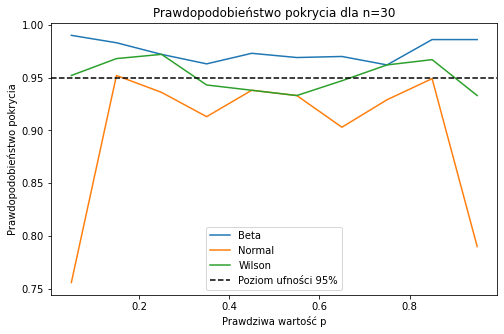

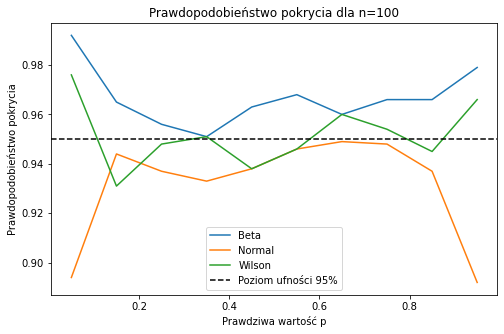

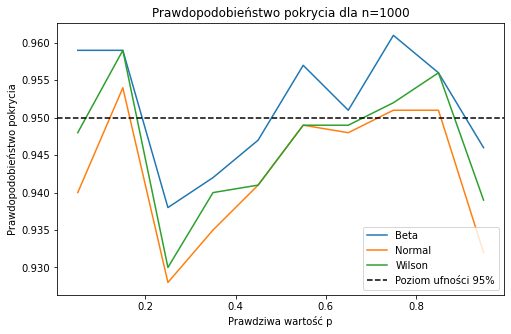

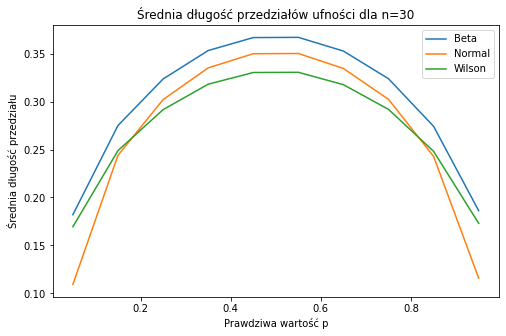

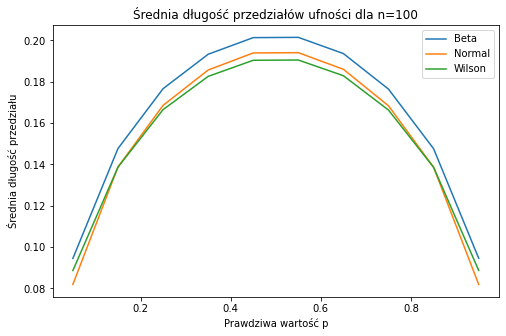

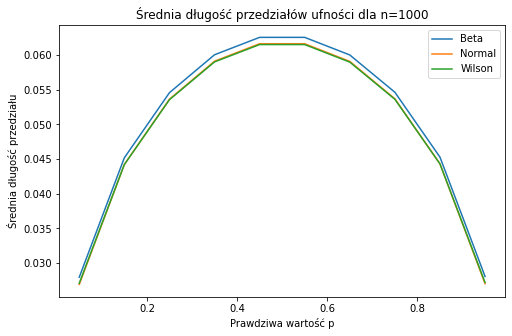

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

# Parametry symulacji
n_values = [30, 100, 1000]  # Rozmiary próby
p_values = np.linspace(0.05, 0.95, 10)  # Różne wartości p
alpha = 0.05  # Poziom istotności (1 - poziom ufności)
num_simulations = 1000  # Liczba symulacji

# Przechowywanie wyników
coverage_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}
length_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}

# Symulacja dla każdego n i p
for n in n_values:
    for p in p_values:
        coverage_counts = {method: 0 for method in ['beta', 'normal', 'wilson']}
        lengths = {method: [] for method in ['beta', 'normal', 'wilson']}

        for _ in range(num_simulations):
            successes = np.random.binomial(n, p)

            for method in ['beta', 'normal', 'wilson']:
                ci_lower, ci_upper = proportion_confint(successes, n, alpha=alpha, method=method)
                lengths[method].append(ci_upper - ci_lower)

                # Sprawdzenie, czy prawdziwe p znajduje się w przedziale
                if ci_lower <= p <= ci_upper:
                    coverage_counts[method] += 1

        # Średnia długość przedziału
        for method in ['beta', 'normal', 'wilson']:
            coverage_results[method][n].append(coverage_counts[method] / num_simulations)
            length_results[method][n].append(np.mean(lengths[method]))

# Tworzenie wykresów pokrycia
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, coverage_results[method][n], label=method.capitalize())
    plt.axhline(0.95, color='black', linestyle='--', label='Poziom ufności 95%')
    plt.xlabel('Prawdziwa wartość p')
    plt.ylabel('Prawdopodobieństwo pokrycia')
    plt.title(f'Prawdopodobieństwo pokrycia dla n={n}')
    plt.legend()
    plt.show()

# Tworzenie wykresów długości przedziałów
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, length_results[method][n], label=method.capitalize())
    plt.xlabel('Prawdziwa wartość p')
    plt.ylabel('Średnia długość przedziału')
    plt.title(f'Średnia długość przedziałów ufności dla n={n}')
    plt.legend()
    plt.show()


## Część V

# Zadanie 10

Celem zadani było zapoznanie się z funkcjami służacymi do wykonania testu dokładnego oraz asympotycznego weryfikującego hipotezę zerową dotyczącą prawodopodobieństwa sukcesu z rozkładu dwumianowego. Przetestowano ich działanie.

In [79]:
from scipy.stats import binomtest

# parametry
successes = 15
n = 20
p0 = 0.5

# test dwustronny
result_binom = binomtest(successes, n, p=p0, alternative='two-sided')
print("Binomtest (dokładny):")
print("p-value:", result_binom.pvalue)

Binomtest (dokładny):
p-value: 0.04138946533203125


In [80]:
from statsmodels.stats.proportion import proportions_ztest

# z-test dla jednej proporcji
count = successes
nobs = n

stat, pval = proportions_ztest(count, nobs, value=p0)
print("\nZ-test (asymptotyczny):")
print("statystyka z:", stat)
print("p-value:", pval)


Z-test (asymptotyczny):
statystyka z: 2.581988897471611
p-value: 0.009823274507519249


# Zadanie 11

In [43]:
import pandas as pd
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05  # poziom istotności

### 1. Czy P(plec='kobieta') = 0.5?

n_kobiet = (df['PŁEĆ'] == 'kobieta').sum()
n_osob = df['PŁEĆ'].notna().sum()

test1 = binomtest(n_kobiet, n_osob, p=0.5, alternative='two-sided')
print("Hipoteza 1: P(kobieta) = 0.5")
print("p-value:", test1.pvalue)
print("Wniosek:", "Odrzucamy H0" if test1.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 2. Czy P(PYT_1='tak') ≥ 0.7?

szkolenia_tak = (df['PYT_1'] == 'tak').sum()
n_szk = df['PYT_1'].notna().sum()

test2 = binomtest(szkolenia_tak, n_szk, p=0.7, alternative='greater')
print("Hipoteza 2: P(PYT_1='tak') ≥ 0.7")
print("p-value:", test2.pvalue)
print("Wniosek:", "Odrzucamy H0" if test2.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 3. Czy P(kierownicze | kobieta) == P(kierownicze | mężczyzna)

df_k = df[df['PŁEĆ'] == 'kobieta']
df_m = df[df['PŁEĆ'] == 'mężczyzna']

count = [
    (df_k['CZY_KIER'] == 'tak').sum(),
    (df_m['CZY_KIER'] == 'tak').sum()
]
nobs = [df_k['CZY_KIER'].notna().sum(), df_m['CZY_KIER'].notna().sum()]

stat3, pval3 = proportions_ztest(count, nobs)
print("Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mężczyzna)")
print("p-value:", pval3)
print("Wniosek:", "Odrzucamy H0" if pval3 < alpha else "Brak podstaw do odrzucenia H0")
print()

### 4. Czy P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)

count = [
    (df_k['PYT_1'] == 'tak').sum(),
    (df_m['PYT_1'] == 'tak').sum()
]
nobs = [df_k['PYT_1'].notna().sum(), df_m['PYT_1'].notna().sum()]

stat4, pval4 = proportions_ztest(count, nobs)
print("Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)")
print("p-value:", pval4)
print("Wniosek:", "Odrzucamy H0" if pval4 < alpha else "Brak podstaw do odrzucenia H0")
print()
# Hipoteza 5: P(ZL | kobieta) ≥ P(ZL | mężczyzna)
# Używamy testu jednostronnego: H0: p1 - p2 = 0, H1: p1 - p2 > 0

count = [
    (df_k['DZIAŁ'] == 'HR').sum(),
    (df_m['DZIAŁ'] == 'HR').sum()
]
nobs = [df_k['DZIAŁ'].notna().sum(), df_m['DZIAŁ'].notna().sum()]

stat5, pval5 = proportions_ztest(count, nobs, alternative='larger')
print("Hipoteza 5: P(HR | kobieta) ≥ P(HR | mężczyzna)")
print("p-value:", pval5)
print("Wniosek:", "Odrzucamy H0" if pval5 < alpha else "Brak podstaw do odrzucenia H0")

Hipoteza 1: P(kobieta) = 0.5
p-value: 1.2446030555722283e-60
Wniosek: Odrzucamy H0

Hipoteza 2: P(PYT_1='tak') ≥ 0.7
p-value: 1.0
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 5: P(HR | kobieta) ≥ P(HR | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0


# Zadanie 12

Celem zadania było wyznaczenie symulacyjnie mocy testu dokładnego oraz mocy testu asymptotycznego w przypadku weryfikacji hipotezy zerowej H₀: p = 0.9 przeciwko H₁: p ≠ 0.9, przyjmując wartość 1 − α = 0.95. Uwzględniono różne wartości alternatyw i różne rozmiary próby.

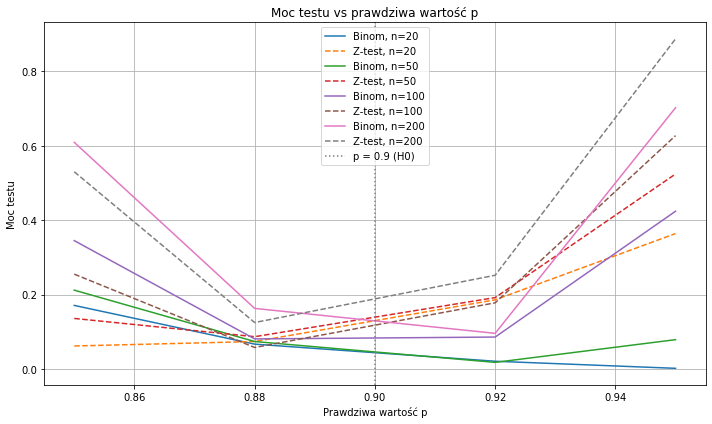

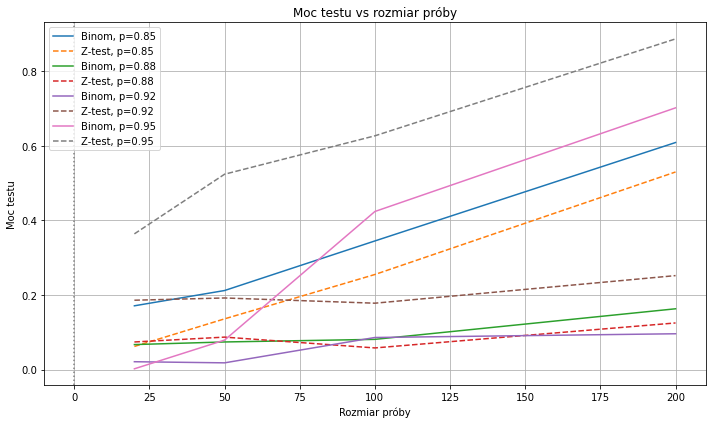

In [102]:
import numpy as np
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# Parametry testu
p0 = 0.9
alpha = 0.05
simulations = 1000
n_values = [20, 50, 100, 200]
p_alt_values = [0.85, 0.88, 0.92, 0.95]

# Wyniki mocy: moc[p][n]
power_binom = {p: [] for p in p_alt_values}
power_ztest = {p: [] for p in p_alt_values}

for n in n_values:
    for p_alt in p_alt_values:
        rejections_binom = 0
        rejections_ztest = 0

        for _ in range(simulations):
            sample = np.random.binomial(1, p_alt, size=n)
            successes = sample.sum()

            p_binom = binomtest(successes, n, p=p0, alternative='two-sided').pvalue
            if p_binom < alpha:
                rejections_binom += 1

            stat, p_z = proportions_ztest(count=successes, nobs=n, value=p0, alternative='two-sided')
            if p_z < alpha:
                rejections_ztest += 1

        power_binom[p_alt].append(rejections_binom / simulations)
        power_ztest[p_alt].append(rejections_ztest / simulations)

# Wykres 1: moc względem prawdziwej wartości p
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_alt_values,
             [power_binom[p][n_values.index(n)] for p in p_alt_values],
             label=f"Binom, n={n}", linestyle='-')
    plt.plot(p_alt_values,
             [power_ztest[p][n_values.index(n)] for p in p_alt_values],
             label=f"Z-test, n={n}", linestyle='--')

plt.axvline(p0, color='gray', linestyle=':', label="p = 0.9 (H0)")
plt.xlabel("Prawdziwa wartość p")
plt.ylabel("Moc testu")
plt.title("Moc testu vs prawdziwa wartość p")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres 2: moc względem rozmiaru próby
plt.figure(figsize=(10, 6))
for p_alt in p_alt_values:
    plt.plot(n_values,
             power_binom[p_alt],
             label=f"Binom, p={p_alt}", linestyle='-')
    plt.plot(n_values,
             power_ztest[p_alt],
             label=f"Z-test, p={p_alt}", linestyle='--')

plt.axvline(x=0, color='gray', linestyle=':')
plt.xlabel("Rozmiar próby")
plt.ylabel("Moc testu")
plt.title("Moc testu vs rozmiar próby")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Wnioski: 

Największa moc testów występuje, gdy p jest znacznie różne od 0.9 (czyli daleko od hipotezy zerowej).Dla wartości bliskich p = 0.9 (czyli H₀) moc testu spada — co jest naturalne, bo trudniej odróżnić wartości bliskie hipotezie zerowej.Test Z ma wyraźnie wyższą moc niż test binominalny. Moc testów rośnie wraz ze wzrostem liczności próby, niezależnie od testu i wartości p. Dla p = 0.95, test Z szybciej osiąga wysoką moc, a test binominalny rośnie wolniej — sugerując przewagę testu Z przy dużych próbach.